In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu
from skimage.filters import gaussian
import matplotlib.patches as mpatches
from skimage.measure import label, regionprops
from skimage.util import invert
from scipy.spatial.distance import euclidean
import easyocr

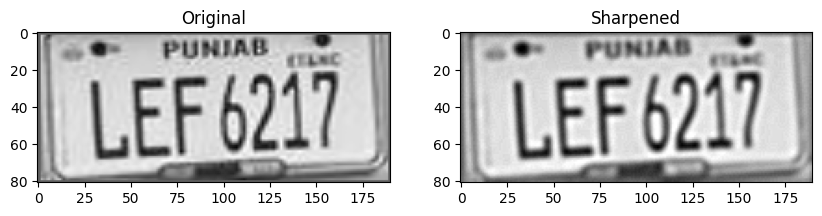

In [114]:
img = cv2.imread("C:\\Users\\DELL\\Documents\\GitHub\\Number-Plate-Recognition-System\\cropped.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# blurred_gray_img = gaussian(gray)
# plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB)) 
# Apply GaussianBlur to reduce noise and make the image less blurry
blurred = cv2.GaussianBlur(gray, (9, 9), 0)  

# Apply image sharpening using a kernel
sharpening_kernel = np.array([[-1, -1, -1],
                              [-1, 9, -1],
                              [-1, -1, -1]])
sharpened = cv2.filter2D(blurred, -1, sharpening_kernel)

# Display the original and sharpened images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1), plt.imshow(gray, cmap='gray'), plt.title('Original')
plt.subplot(1, 2, 2), plt.imshow(sharpened, cmap='gray'), plt.title('Sharpened')
plt.show()

In [115]:
# Apply noise reduction and edge detection
bfilter = cv2.bilateralFilter(sharpened, 11, 17, 17)
edged = cv2.Canny(bfilter, 30, 200)

In [116]:
# # Apply thresholding
# thresh = cv2.adaptiveThreshold(edged, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
ret, thresh = cv2.threshold(edged, 127, 255, cv2.THRESH_BINARY)

In [117]:
# # Perform connected component labeling
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(thresh)

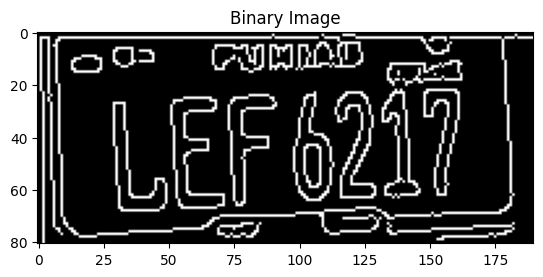

In [118]:
 # Visualize the binary image
plt.imshow(thresh, cmap='gray')
plt.title('Binary Image')
plt.show()


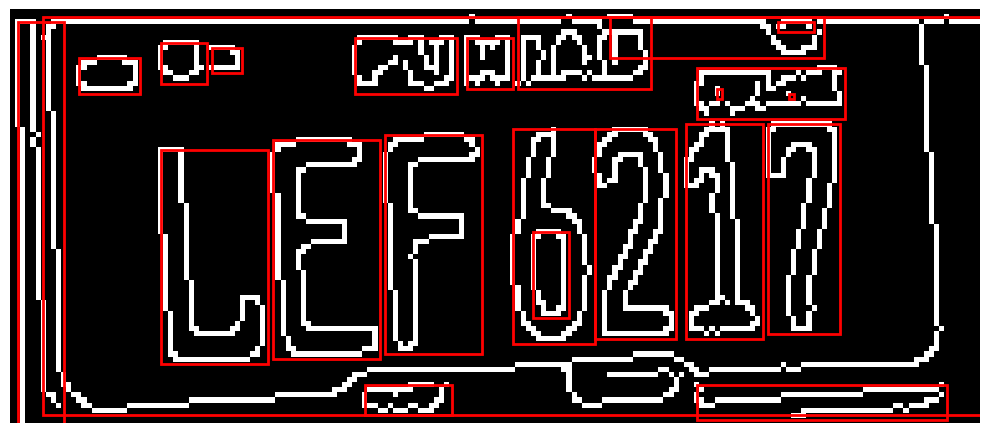

In [119]:
label_image = label(thresh, connectivity=2)

fig, ax = plt.subplots(figsize=(10, 6))
ax.axis("off")
ax.imshow(thresh, cmap="gray")

for region in regionprops(label_image):
    minr, minc, maxr, maxc = region.bbox
    rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                              fill=False, edgecolor='red', linewidth=2)
    ax.add_patch(rect)

plt.tight_layout()
plt.show()

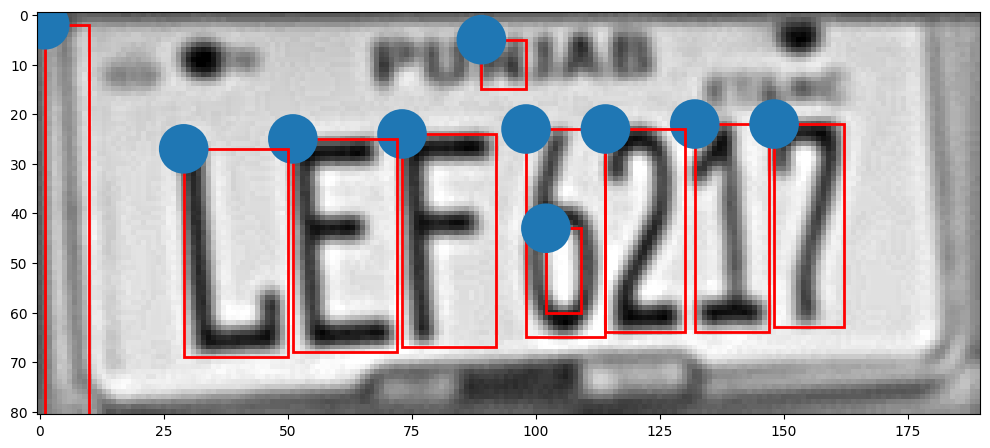

In [120]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(sharpened, cmap="gray")

text_like_regions = []
for region in regionprops(label_image):
    minr, minc, maxr, maxc = region.bbox
    w = maxc - minc
    h = maxr - minr
    
    asr = w/h
    
    region_area = w*h
    
    wid,hei = sharpened.shape
    img_area = wid*hei
    
    # The aspect ratio is less than 1 to eliminate highly elongated regions
    # The size of the region should be greater than 15 pixels but smaller than 1/5th of the image
    # dimension to be considered for further processing
    if region_area > 15 and region_area < (0.2 * img_area) and asr < 1 and h > w:
        #print(w, h, i, region.area, region.bbox)
        text_like_regions.append(region)

all_points = []
for region in text_like_regions:
    minr, minc, maxr, maxc = region.bbox
    rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                              fill=False, edgecolor='red', linewidth=2)
    ax.add_patch(rect)
    circ = mpatches.Circle((minc, minr), radius=5)
    ax.add_patch(circ)
    all_points.append([minc, minr, maxc, maxr])
    
plt.tight_layout()
plt.show() 

In [121]:
reader = easyocr.Reader(['en']) 

# Convert the image to RGB format (EasyOCR requires RGB images)
sharpened_rgb = cv2.cvtColor(sharpened, cv2.COLOR_BGR2RGB)

# Use EasyOCR to extract text
results = reader.readtext(sharpened_rgb)

# Print the extracted text
for detection in results:
    text = detection[1]
    print("Extracted Text:", text)


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Extracted Text: LEF 6217
